
# <span style="color:rgb(213,80,0)">Efficiency Map of Motor Drive Unit</span>

This script collects block parameters from the Basic model of Motor Drive Unit component and makes a plot of motor efficiency contour map.

## Basic model

In [1]:
mdl = "MotorDriveUnit_refsub_Basic";
MotorDriveUnit_refsub_Basic_params
load_system(mdl)
blkpath = mdl + "/Motor & Drive (Driveline)";
info = MotorDriveUnit_getBlockInfo_Basic(blkpath)

info = 
                      MaxTorque_Nm: 420
                       MaxPower_kW: 220
                    ResponseTime_s: 0.0200
                    Efficiency_pct: 95
                Speed_measured_rpm: 2000
                Torque_measured_Nm: 50
    MechanicalPower_measurement_kW: 10.4720
            NominalLoss_measured_W: 551.1566
               IronLoss_measured_W: 55.1157
             CopperLoss_measured_W: 496.0409


The Basic model has a rotor damper block, whose damping parameter can be passed to the plot function to make a more accurate efficiency plot.



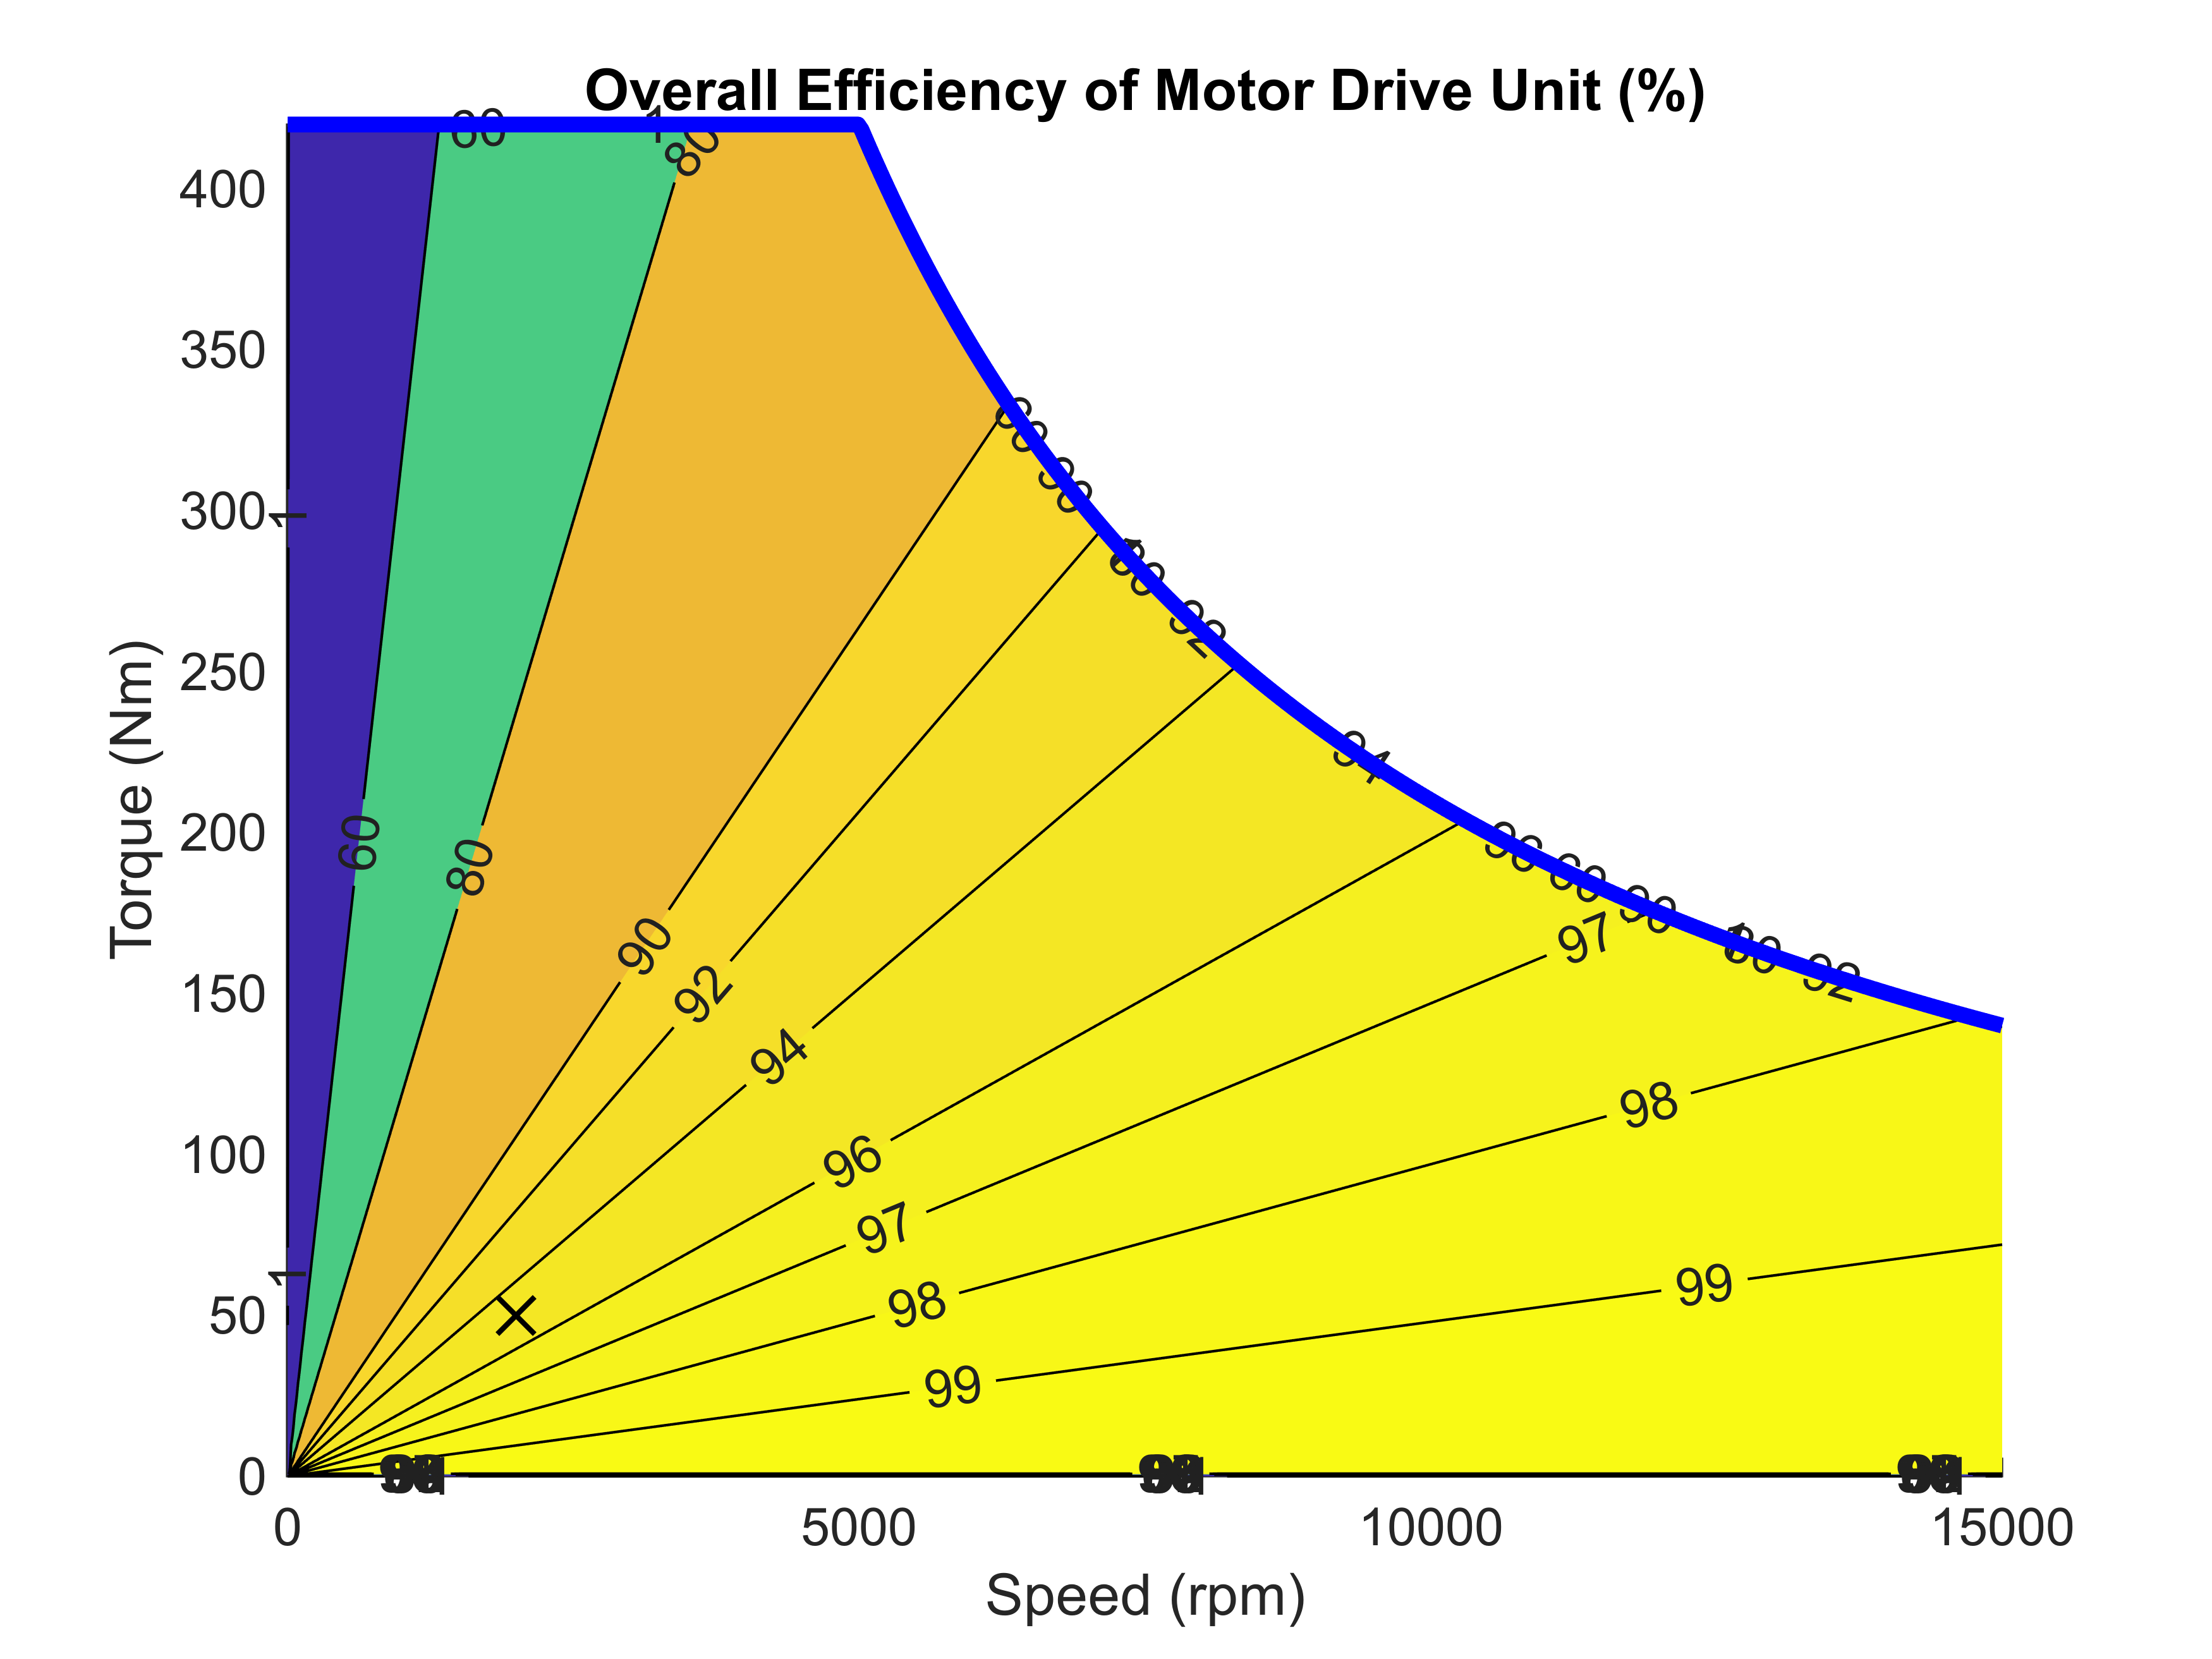

In [2]:
dampParam = getSimscapeValueFromBlockParameter( mdl+"/Rotor damper", "D" );
k_damp = value(dampParam, "N*m/(rad/s)");

MotorDriveUnit_plotEfficiency_Basic( ...
  ... In road vehicle applications,
  ... maximum motor speed is determined by vehicle top speed,
  ... tire rolling radius, and reduction gear ratio.
  MaxSpeed_rpm = 15000, ...
  ...
  MaxTorque_Nm = info.MaxTorque_Nm, ...
  MaxPower_kW = info.MaxPower_kW, ...
  Efficiency_pct = info.Efficiency_pct, ...
  Speed_measured_rpm = info.Speed_measured_rpm, ...
  Torque_measured_Nm = info.Torque_measured_Nm, ...
  RotorDamping_Nm_per_radps = k_damp, ...
  ContourLevels_pct = [1 60 80 90 92 94 96 97 98 99], ...
  PlotResolution = 500 );

In [3]:

%{
FullpathToFolder = fullfile(currentProject().RootFolder, ...
  "Components", "MotorDriveUnit", "Utility", "Images");
imgFilename = mdl + "_efficiency.png"
exportgraphics(gca, fullfile(FullpathToFolder, imgFilename))
%}


*Copyright 2021-2023 The MathWorks, Inc.*

